# Iris Flower Classification

we are trying to solve a multi-class problem using attributes of flowers to predict the species of the flowers. Specifically we are trying to use
the `sepallength`, `SepalWidth`, `petalLength`, `PetalWidth` to predict if an iris flower is of type `Setosa`, `Versicolor`,
 or `Verginica`

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df = df.drop(['Id'], axis=1)

In [6]:
df.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
130,7.4,2.8,6.1,1.9,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# EDA

In [10]:
sns.set_palette('pastel')

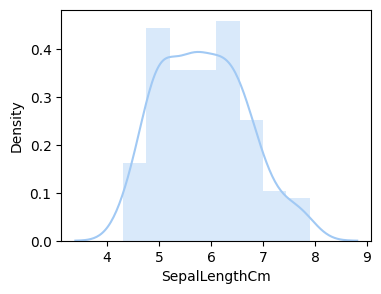

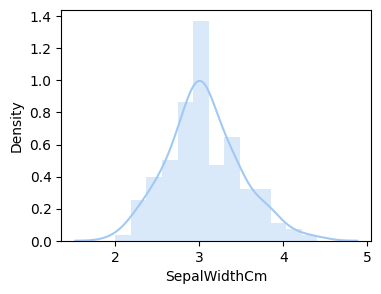

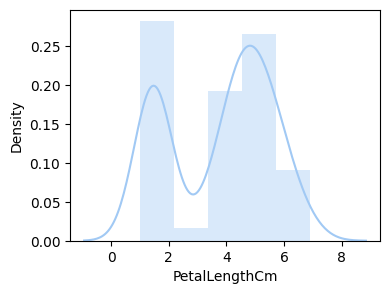

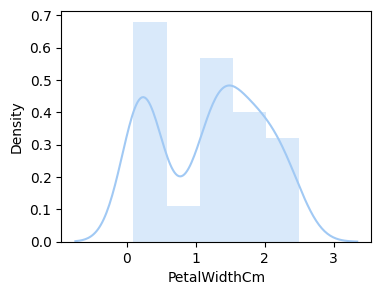

In [11]:
for col in df.columns[:-1]:
    plt.figure(figsize=(4,3))
    sns.distplot(df[col])
    plt.show()

In [12]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

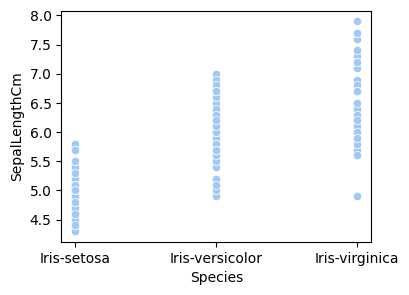

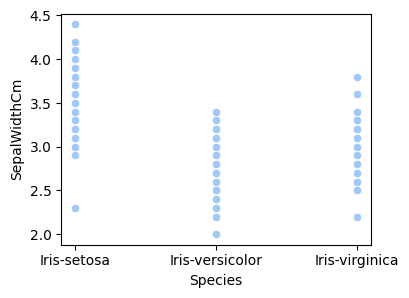

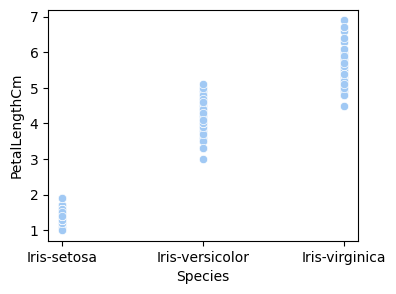

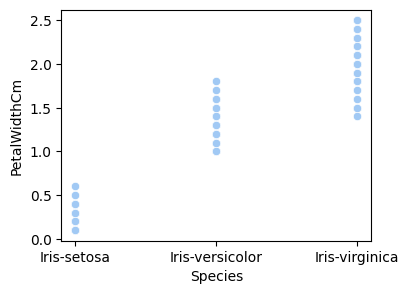

In [13]:
for col in df.columns[:-1]:
    plt.figure(figsize=(4,3))
    sns.scatterplot(data=df, y=col, x='Species')
    plt.show()

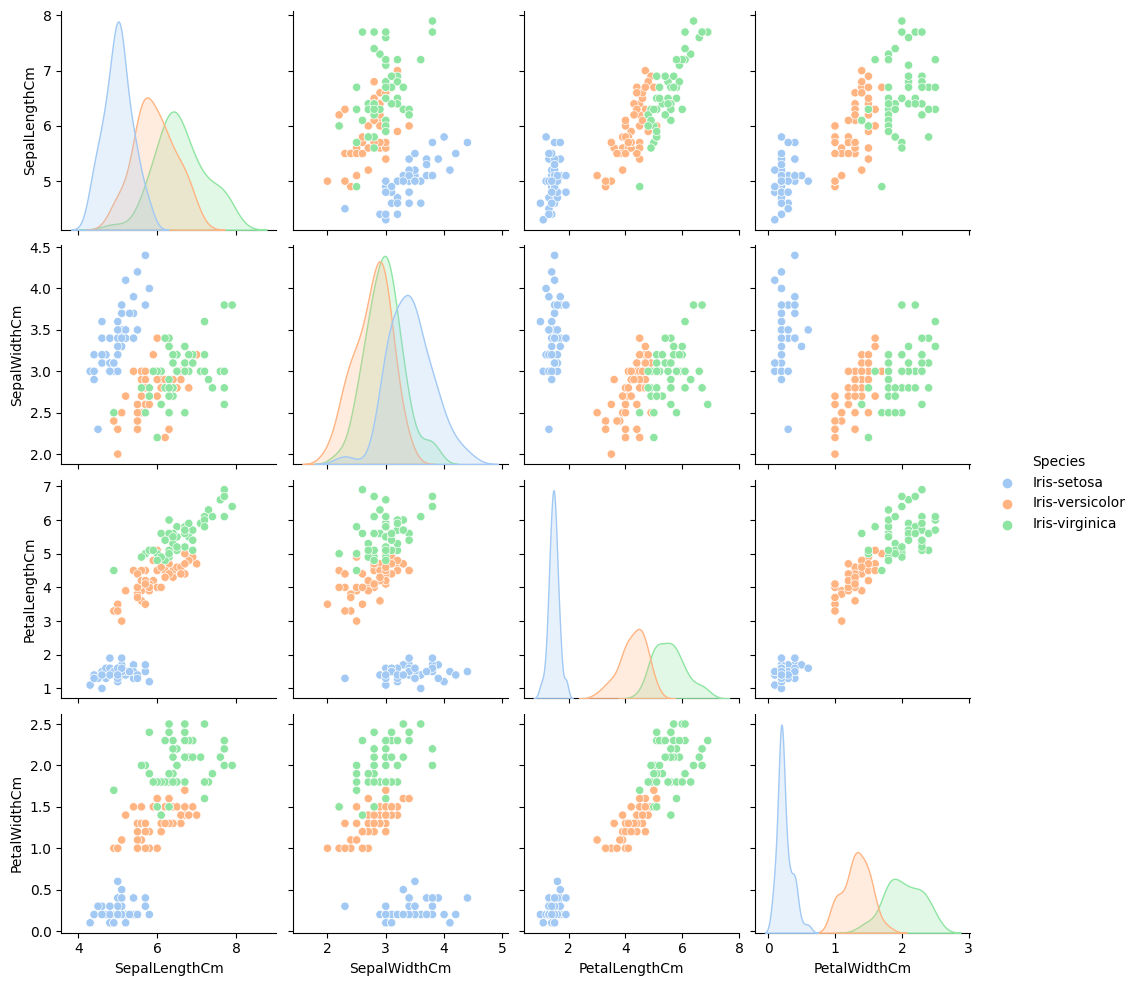

In [14]:
sns.pairplot(df, hue='Species')
plt.show()

In [15]:
cor_matrix = df.corr()
cor_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


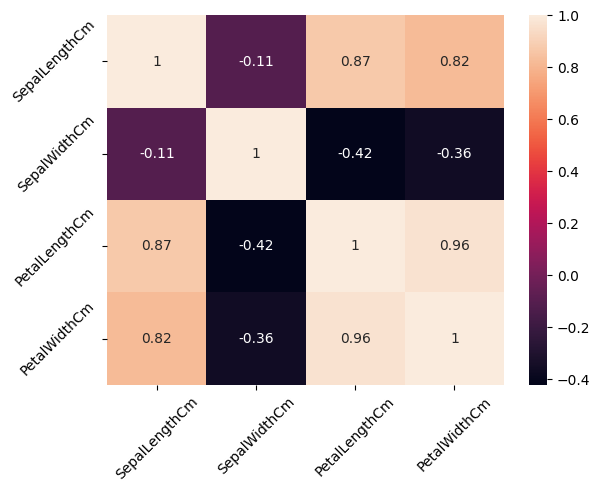

In [16]:
sns.heatmap(cor_matrix, annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
x = df.drop(['Species'], axis=1)
y = df['Species']

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
y = le.fit_transform(y)

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(f'x_train shape : {x_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'x_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

x_train shape : (120, 4)
x_test shape : (30, 4)
x_train shape : (120,)
y_test shape : (30,)


In [23]:
trf1 = ColumnTransformer([
    ('scaling', StandardScaler(),[0,1,2,3])
])

In [24]:
pipe = Pipeline([
    ('trf1',trf1)
])

In [25]:
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  [0, 1, 2, 3])]))])

In [26]:
x_train_process = pipe.fit_transform(x_train)

In [27]:
x_train_process[0]

array([-1.47393679,  1.22037928, -1.5639872 , -1.30948358])

In [28]:
x_test_process = pipe.transform(x_test)

In [29]:
x_test_process[0]

array([ 0.35451684, -0.57925837,  0.5576453 ,  0.02332414])

# model training

In [30]:
logreg = LogisticRegression()
logreg.fit(x_train_process, y_train)

LogisticRegression()

In [31]:
y_pred = logreg.predict(x_test_process) 
print(f'accuracy_score : {accuracy_score(y_test, y_pred)}')

accuracy_score : 1.0


In [32]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

### k-fold cross validation

In [33]:
k_fold = 5
accuracy = cross_val_score(logreg, x_train_process,y_train, scoring='accuracy', cv=k_fold)

In [34]:
mean_accuracy = np.mean(accuracy)
print(mean_accuracy)

0.9583333333333334


### hyperparameter tuning

In [35]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],              
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5)

# Perform the grid search on your data
grid_search.fit(x_train_process, y_train)

# Print the best hyperparameters and the corresponding best score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'C': 1, 'penalty': 'l2'}
Best Accuracy Score:  0.9583333333333334


# model selection
- classification task
    - logistic regression
    - decision tree classifier
    - random forest
    - svm

In [36]:
# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# an empty list to store results
results = []

for model_name, model in models.items():
    # train the model
    model.fit(x_train_process, y_train)
    
    # predict on test data
    predictions = model.predict(x_test_process)
    
    # calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    
    print('For ', model_name)
    print('accuracy : ', accuracy)
    print('---------------------------------->')
    
    results.append({'Model': model_name, 'Accuracy': accuracy})
results_df = pd.DataFrame(results)

For  Logistic Regression
accuracy :  1.0
---------------------------------->
For  Decision Tree
accuracy :  1.0
---------------------------------->
For  Random Forest
accuracy :  1.0
---------------------------------->
For  SVM
accuracy :  1.0
---------------------------------->


In [37]:
results_df

,Model,Accuracy
0,Logistic Regression,1.0
1,Decision Tree,1.0
2,Random Forest,1.0
3,SVM,1.0


**Due very small dataset all model overfit and model may easily memorize the data and achieve high accuracy**

# hyperparameter tuning and cross validation

In [38]:
# Define the hyperparameter grids for each model
pg_logreg = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }

pg_dt = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

pg_rf = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

pg_svm = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }


# Initialize models with GridSearchCV
models_with_params = {
    'Logistic Regression':(LogisticRegression(), pg_logreg),
    'Decision Tree': (DecisionTreeClassifier(), pg_dt),
    'Random Forest': (RandomForestClassifier(), pg_rf),
    'SVM': (SVC(), pg_svm)
}

tuned_results = []

for model_name, (model, param_grid) in models_with_params.items():
    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
    grid_search.fit(x_train_process, y_train)
    
    # best hyperparameters
    best_params = grid_search.best_params_
    
    # best model
    best_model = grid_search.best_estimator_
    best_model.fit(x_train_process, y_train)
    
    y_pred = best_model.predict(x_test_process)
    accuracy = accuracy_score(y_test, y_pred)
    
    # cross validation
    cv_scores = cross_val_score(best_model, x_train_process, y_train, cv=5, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    
    
    print(model_name)
    print(f'accuracy: {accuracy}')
    print(f'cv_scores : {cv_scores}')
    print(f'mean_accuracy: {round(mean_accuracy, 3)}')
    print(f'best_params: {best_params}')   
    print('---------------------------------------> ')
    
    tuned_results.append({'Model': model_name,
                          'Accuracy':accuracy,
                          'mean_accuracy': mean_accuracy,
                          'cv_scores': cv_scores,
                          'Best Hyperparameters': best_params})

Logistic Regression
accuracy: 1.0
cv_scores : [0.95833333 1.         0.875      1.         0.95833333]
mean_accuracy: 0.958
best_params: {'C': 1, 'penalty': 'l2'}
---------------------------------------> 
Decision Tree
accuracy: 1.0
cv_scores : [0.95833333 0.95833333 0.875      0.95833333 0.95833333]
mean_accuracy: 0.942
best_params: {'max_depth': 10, 'min_samples_split': 2}
---------------------------------------> 
Random Forest
accuracy: 1.0
cv_scores : [0.95833333 1.         0.875      1.         0.95833333]
mean_accuracy: 0.958
best_params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
---------------------------------------> 
SVM
accuracy: 0.9666666666666667
cv_scores : [0.95833333 1.         0.83333333 1.         1.        ]
mean_accuracy: 0.958
best_params: {'C': 10, 'kernel': 'linear'}
---------------------------------------> 


In [39]:
# Create a DataFrame with model name, accuracy, and best parameters
tuned_df = pd.DataFrame(tuned_results)
tuned_df

,Model,Accuracy,mean_accuracy,cv_scores,Best Hyperparameters
0,Logistic Regression,1.000000,0.958333,"[0.9583333333333334, 1.0, 0.875, 1.0, 0.958333...","{'C': 1, 'penalty': 'l2'}"
1,Decision Tree,1.000000,0.941667,"[0.9583333333333334, 0.9583333333333334, 0.875...","{'max_depth': 10, 'min_samples_split': 2}"
2,Random Forest,1.000000,0.958333,"[0.9583333333333334, 1.0, 0.875, 1.0, 0.958333...","{'max_depth': None, 'min_samples_split': 5, 'n..."
3,SVM,0.966667,0.958333,"[0.9583333333333334, 1.0, 0.8333333333333334, ...","{'C': 10, 'kernel': 'linear'}"


In [40]:
tuned_data = pd.melt(tuned_df, id_vars='Model').iloc[:8,:]

In [41]:
tuned_data

,Model,variable,value
0,Logistic Regression,Accuracy,1.0
1,Decision Tree,Accuracy,1.0
2,Random Forest,Accuracy,1.0
3,SVM,Accuracy,0.966667
4,Logistic Regression,mean_accuracy,0.958333
5,Decision Tree,mean_accuracy,0.941667
6,Random Forest,mean_accuracy,0.958333
7,SVM,mean_accuracy,0.958333


<Axes: xlabel='Model', ylabel='mean_accuracy'>

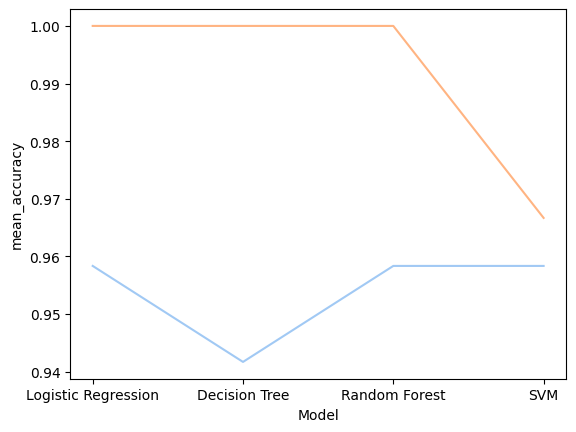

In [42]:
sns.lineplot(data= tuned_df, x='Model', y='mean_accuracy')
sns.lineplot(data= tuned_df, x='Model', y='Accuracy')

we can se that the Decision tree model is consistent on kfold cross validation. we can conclude that it perform better on given scenerio

A model with consistent high accuracy on k-fold cross-validation is generally a good choice because it's less likely to be overfitting or providing results influenced by randomness.

In [43]:
import pickle

# best-performing model(decision tree)
best_model_row = tuned_df[tuned_df['Model'] == 'Decision Tree'].iloc[0]
best_hyperparameter = best_model_row['Best Hyperparameters']

# train
best_model = DecisionTreeClassifier(**best_hyperparameter)
best_model.fit(x_train_process, y_train)

# save preprocessing
with open('pipe.pkl', 'wb') as pipe_file:
    pickle.dump(pipe, pipe_file)
    
# save the trained decision tree model
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
    
print('pipe and model save successful!')

pipe and model save successful!


# loading pipe and model and preding on values

In [44]:
import pickle
# loading best model
with open('best_model.pkl', 'rb') as model_file:
    best_model = pickle.load(model_file)
    
# loading the pipe
with open('pipe.pkl', 'rb') as pipe_file:
    pipe = pickle.load(pipe_file)

In [49]:
df.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
33,5.5,4.2,1.4,0.2,Iris-setosa
74,6.4,2.9,4.3,1.3,Iris-versicolor
140,6.7,3.1,5.6,2.4,Iris-virginica


#### flowes species
0 --> `Iris-Setosa`
1 --> `Iris-versicolor`
2 --> `Iris-virginica`

In [51]:
new = [[float(input()) for _ in range(4)]]
new_process = pipe.transform(new)
print('after_processing : ',new_process)
y_pred = best_model.predict(new_process)
if y_pred == 0:
    print('Iris-Setosa')
elif y_pred == 1:
    print('iris-Vesicolor')
else:
    print('Iris-virginica')

6.7
3.1
5.6
2.4
after_processing :  [[1.08589829 0.09560575 1.07371807 1.6226934 ]]
Iris-virginica
